In [1]:
# Import required libraries

from matplotlib import pyplot
import numpy as np
import os
import shutil
import caffe2.python.predictor.predictor_exporter as pe
import cv2

from caffe2.python import (
    brew,
    core,
    model_helper,
    net_drawer,
    optimizer,
    visualize,
    workspace,
    cnn,
)
from IPython.display import Markdown
from IPython.display import Image

# If you would like to see some really detailed initializations,
# you can change --caffe2_log_level=0 to --caffe2_log_level=-1
core.GlobalInit(['caffe2', '--caffe2_log_level=0'])

def printmd(string):
    display(Markdown(string))

printmd("**Necessities imported!**")

**Necessities imported!**

In [2]:
#Load a Test input Image
img = cv2.imread("./images/test1.jpg", 1)
print("image shape = ",img.shape)

image shape =  (500, 500, 3)


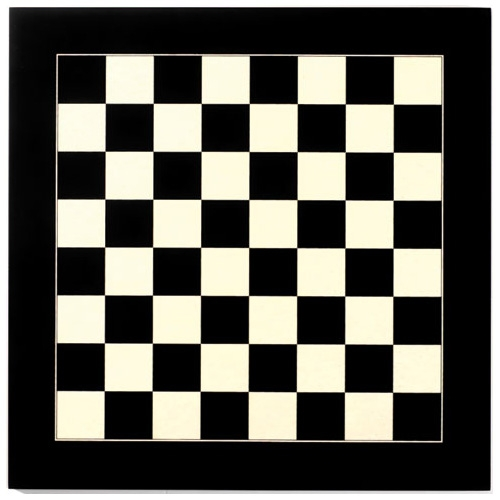

In [3]:
Image(filename="images/test1.jpg") 

# 1. Understanding shapes of convoluted outputs

In [4]:
# Modify Input Data

# 1. Reshape Input data to square matrix
img_1 = cv2.resize(img, (360,360))
print("Reshaped image size = ", img_1.shape)

# 2. Convert 3 channel RGB image to 1 channel grayscale image
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
print("Grayscale image size = ", img_1.shape)

# 3. Reshape Image to format [N, C, H, W]
# N - Number of images (Batch Size)
# C - Channels
# H - Height
# W - Width
h,w = img_1.shape
img_1 = np.reshape(img_1, (1,1,h,w))
img_1 = img_1.astype(np.float32)
print("Final shape Of Image = ", img_1.shape)

Reshaped image size =  (360, 360, 3)
Grayscale image size =  (360, 360)
Final shape Of Image =  (1, 1, 360, 360)


In [5]:
# Loading 3x3 Kernel
input_data1 = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]
input_data1 = np.array(input_data1, dtype=np.float32)
input_data1 = np.reshape(input_data1, (1,1,3,3))
print("input_data1 shape = ", input_data1.shape)

input_data1 shape =  (1, 1, 3, 3)


In [6]:
# Creating and running the operator
op = core.CreateOperator(
    "Conv", # The type of operator that we want to run
    ["X", "w"], # Inputs
    ["Y"], # Output
    kernel=3,
    stride_h=1,
    stride_w=1,
    pad_t=1,
    pad_l=1,
    pad_b=0,
    pad_r=0,
)

#Run the operator
workspace.ResetWorkspace()
workspace.FeedBlob("X", img_1)
workspace.FeedBlob("w", input_data1)
workspace.RunOperatorOnce(op)

True

In [7]:
# Get the output image
out_img_1 = workspace.FetchBlob("Y")
print("Output Data shape = ", out_img_1.shape)
n,c,h,w = out_img_1.shape
out_img_1 = np.reshape(out_img_1, (h,w))

Output Data shape =  (1, 1, 359, 359)


###  Checking the shape as per non-strided convolution formula to estimate output shape
H_i             - Height of input data 
W_i             - Width of input data
p_i             - padding (left, right, bottom, top)

f_h             - Height of filter  
f_w             - Width of filter

H_o             - Height of output data
W_o             - Width of output data

H_o = H_i + pad_t + pad_b - f_h + 1
H_o = 360 +  1    +   0   - 3   + 1 = 359

W_o = W_i + pad_l + pad_r - f_w + 1
W_o = 360 +   1   +    0  - 3   + 1 = 359

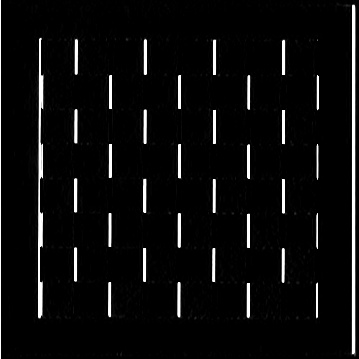

In [8]:
# Save and display the image
cv2.imwrite("images/sample_filter.jpg", out_img_1)
Image(filename="images/sample_filter.jpg")

## 2. Detecting Horizontal Edges

input_data1 shape =  (1, 1, 3, 3)
Output Data shape =  (1, 1, 359, 359)


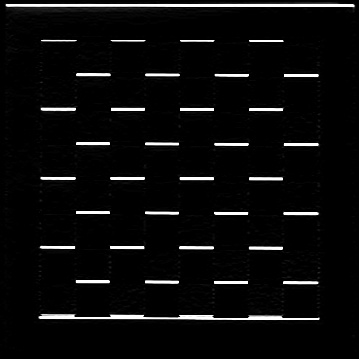

In [9]:
# Loading 3x3 Kernel
input_data1 = [
    [1,2,1],
    [0, 0, 0],
    [-1,-2,-1]
]
input_data1 = np.array(input_data1, dtype=np.float32)
input_data1 = np.reshape(input_data1, (1,1,3,3))
print("input_data1 shape = ", input_data1.shape)

# Creating and running the operator
op = core.CreateOperator(
    "Conv", # The type of operator that we want to run
    ["X", "w"], # Inputs
    ["Y"], # Output
    kernel=3,
    stride_h=1,
    stride_w=1,
    pad_t=1,
    pad_l=1,
    pad_b=0,
    pad_r=0,
)

#Run the operator
workspace.ResetWorkspace()
workspace.FeedBlob("X", img_1)
workspace.FeedBlob("w", input_data1)
workspace.RunOperatorOnce(op)

# Get the output image
out_img_1 = workspace.FetchBlob("Y")
print("Output Data shape = ", out_img_1.shape)
n,c,h,w = out_img_1.shape
out_img_1 = np.reshape(out_img_1, (h,w))

# Save and display the image
cv2.imwrite("images/edge_45.jpg", out_img_1)
Image(filename="images/edge_45.jpg")